In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats


In [98]:
#recupération de la variable 

df_clean = pd.read_csv('data/df_clean.csv')

df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


# Normalisation du jeu de données

In [77]:
df_clean['smoker']= (df_clean['smoker']=="yes").astype(int)
df_clean['sex']= (df_clean['sex']=='male').astype(int)
for region in df_clean['region'].unique():
    r = f'is_{region}'
    df_clean[r] = 0
    df_clean.loc[df_clean['region'] == region, r] = 1
df_clean.drop('region', axis=1, inplace=True)
df_clean

,Unnamed: 0,age,sex,bmi,children,smoker,charges,is_southwest,is_southeast,is_northwest,is_northeast
0,0,19,0,27.900,0,1,16884.92400,1,0,0,0
1,1,18,1,33.770,1,0,1725.55230,0,1,0,0
2,2,28,1,33.000,3,0,4449.46200,0,1,0,0
3,3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,4,32,1,28.880,0,0,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,1,30.970,3,0,10600.54830,0,0,1,0
1333,1334,18,0,31.920,0,0,2205.98080,0,0,0,1
1334,1335,18,0,36.850,0,0,1629.83350,0,1,0,0
1335,1336,21,0,25.800,0,0,2007.94500,1,0,0,0


<Axes: >

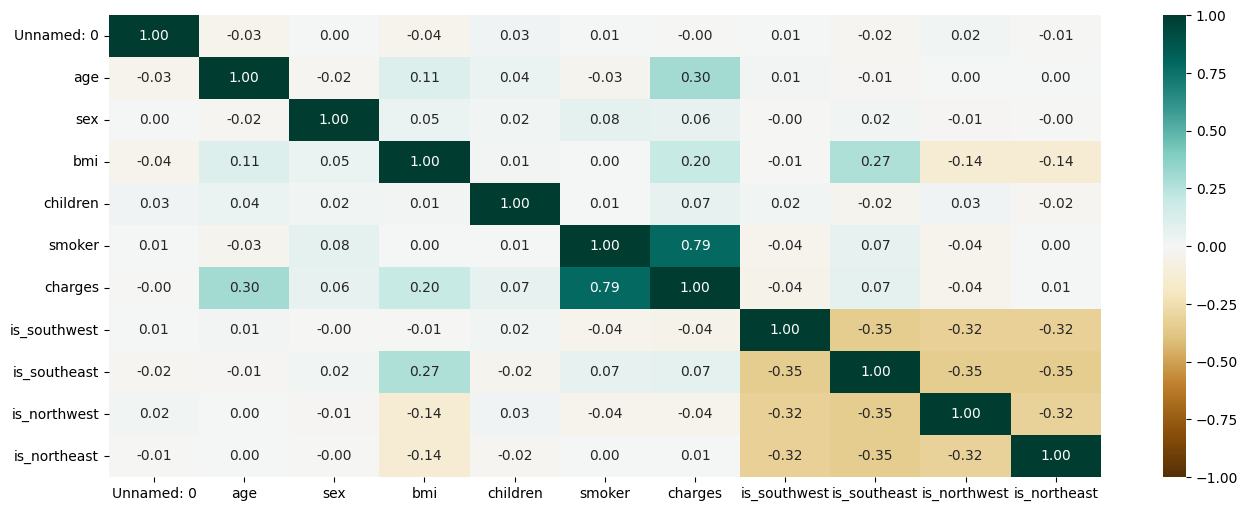

In [78]:

plt.figure(figsize=(16, 6))
sns.heatmap(df_clean.corr(method='pearson'), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='BrBG')

Nous remarquons plusieurs correlations avec la target :
- charges/smoke 0.79
- charges/age 0.3
- charges/bmi 0.20

De plus, nous observons une corrélation entre deu variables "indépendantes":
- region southeast/bmi

Par conséquent, nous procéderons de la manière suivante:

- Représentation ScatterPlot pour l'annalyse charges/age et charges/bmi
- Confirmation de la relation via Anova pour charges/smoke et region southeast/bmi






# Catégorisation BMI et Age

In [79]:
# catégorisation des ages
intervals = [(18, 35, 1), (36, 50, 2), (51, 70, 3), (71, 200, 4)]
df_clean['age_cat'] = pd.Series()

for interval in intervals:
    min, max, name = interval
    col = f'{min}_{max}'
    df_clean[col] = 0
    df_clean.loc[(df_clean.age >= min) & (df_clean.age <= max), 'age_cat'] = col
    df_clean.loc[(df_clean.age >= min) & (df_clean.age <= max), col] = 1

In [80]:
# catégorisation de bmi
intervals = [(0, 18.5, 'underweight'), (18.50001, 25, 'normal'), (25.0001, 30, 'overweight'), (30.00001, 200, 'obesity')]
df_clean['bmi_cat'] = pd.Series()

for interval in intervals:
    min, max, name = interval
    col = name
    df_clean[col] = 0
    df_clean.loc[(df_clean.bmi >= min) & (df_clean.bmi <= max), 'bmi_cat'] = col
    df_clean.loc[(df_clean.bmi >= min) & (df_clean.bmi <= max), col] = 1
    
df_clean

,Unnamed: 0,age,sex,bmi,children,smoker,charges,is_southwest,is_southeast,is_northwest,...,age_cat,18_35,36_50,51_70,71_200,bmi_cat,underweight,normal,overweight,obesity
0,0,19,0,27.900,0,1,16884.92400,1,0,0,...,18_35,1,0,0,0,overweight,0,0,1,0
1,1,18,1,33.770,1,0,1725.55230,0,1,0,...,18_35,1,0,0,0,obesity,0,0,0,1
2,2,28,1,33.000,3,0,4449.46200,0,1,0,...,18_35,1,0,0,0,obesity,0,0,0,1
3,3,33,1,22.705,0,0,21984.47061,0,0,1,...,18_35,1,0,0,0,normal,0,1,0,0
4,4,32,1,28.880,0,0,3866.85520,0,0,1,...,18_35,1,0,0,0,overweight,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,1,30.970,3,0,10600.54830,0,0,1,...,36_50,0,1,0,0,obesity,0,0,0,1
1333,1334,18,0,31.920,0,0,2205.98080,0,0,0,...,18_35,1,0,0,0,obesity,0,0,0,1
1334,1335,18,0,36.850,0,0,1629.83350,0,1,0,...,18_35,1,0,0,0,obesity,0,0,0,1
1335,1336,21,0,25.800,0,0,2007.94500,1,0,0,...,18_35,1,0,0,0,overweight,0,0,1,0


# Analyse

## Analyse Age/charges


In [81]:

a,b,r,p,_ = stats.linregress(df_clean.age, df_clean.charges)

a,b,r,p



(257.2297175179149,
 3190.0217210318224,
 0.2983082125097864,
 6.975748762691313e-29)

Nous remarquons une forte corrélation entre l'age et les charges, le calcul de la p-value et du coefficient de Pearson l'attestent

<Figure size 640x480 with 0 Axes>

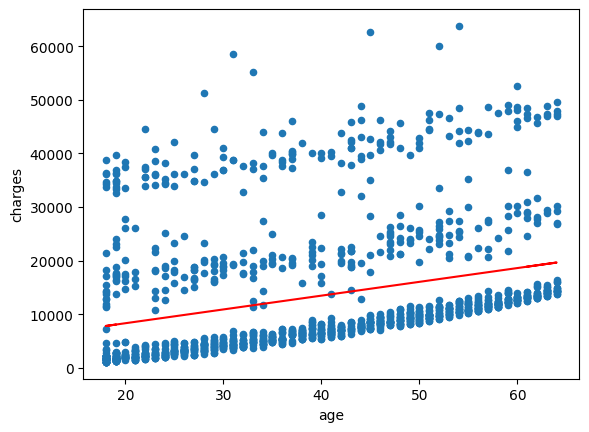

In [82]:
plt.figure(1)
df_clean.plot('age','charges',kind='scatter')
plt.figure(2)
plt.plot(df_clean.age, a*df_clean.age + b , 'red')


## Analyse BMI/charges

In [83]:
a,b,r,p,_ = stats.linregress(df_clean.bmi, df_clean.charges)

a,b,r,p


(393.8558912099734,
 1202.1403670662148,
 0.1984008312262494,
 2.4680404264512973e-13)

<Figure size 640x480 with 0 Axes>

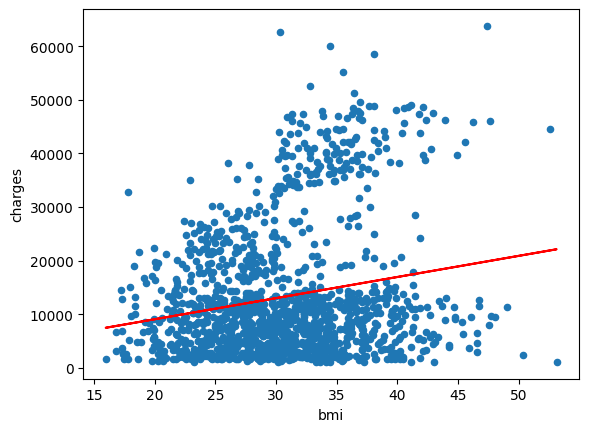

In [84]:
plt.figure(1)
df_clean.plot('bmi','charges',kind='scatter')
plt.figure(2)
plt.plot(df_clean.bmi, a*df_clean.bmi + b , 'red')



## Analyse Smoker/Charges


Anova est un modèle d'analyse qui permet de comparer la variation d'une variable qualitative et d'une variable quantitative

<Axes: title={'center': 'charges'}, xlabel='smoker'>

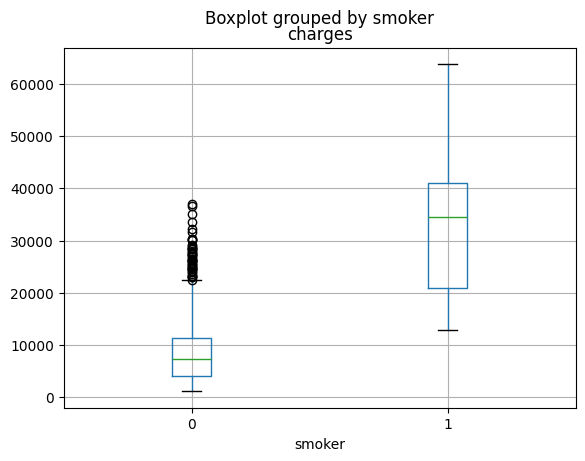

In [85]:
# boxplot

df_clean.boxplot('charges', by='smoker')

Nous soulignons une varaition significative de la médiane que l'observation soit fumeuse ou non. L'observation de plusieurs valeurs atypiques laisse penser que d'autres variables ont une influence significative avec la charge.
Nous allons vérifier avec le modèle Anova cad l'analyse de la variance.

<Axes: xlabel='smoker', ylabel='charges'>

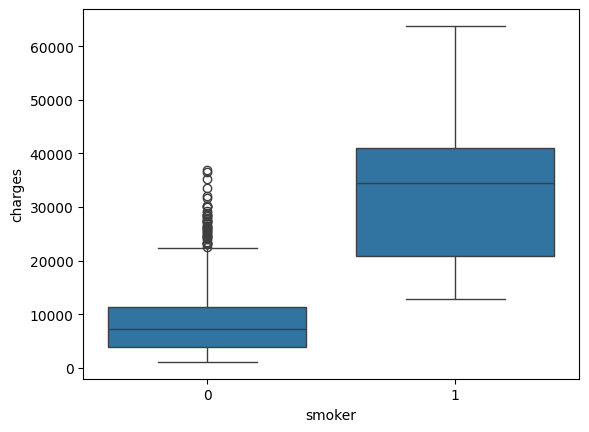

In [86]:
sns.boxplot(x=df_clean.smoker, y=df_clean.charges)

In [87]:
statf,pvalue = stats.f_oneway(df_clean.charges[df_clean.smoker==1],df_clean.charges[df_clean.smoker==0])
statf,pvalue

(2175.7368631272116, 1.4067220949358597e-282)

Nous observons une pvalue très faible, ainsi nus rejetons l'hypothèse nulle. Cela veut dire qu'il y a un effet dans les données qui n'est pas dû au hasard.

## Analyse Bivariée


### Analyse bivariée entre deux variables quantitatives (coefficient de corrélation)

#### cas du BMI et de la CHARGE

In [88]:
a,b,r,p,_ = stats.linregress(df_clean.bmi, df_clean.charges)

a,b,r,p

# a = coefficient de pente de la regression linéaire
# b = l'ordonnée à l'origine
# r = coefficient de corrélation. Valeur comprise entre -1< r < 1 avec -1 une forte correlation négative,
# 0 absence de correlation et 1 une forte corrélation positive.
# p = p_value (valeur de probabilité) permet evaluer la validité de H0 (hypothèse nulle) 
# cad absence effet ou de différence significative


(393.8558912099734,
 1202.1403670662148,
 0.1984008312262494,
 2.4680404264512973e-13)

Interpretation : Concernant le coefficient de corrélation, celui-ci s'élève à 0.1984 indiquant l'existance d'une corrélation positive mais faible. La relation netre les deux variables n'est pas très forte.
Cependant la p-value, avec une valeur très proche de 0, indique que cette corrélation observée n'est pas dûe au hasard. Donc ces deux variables sont biens corrélées.


Représentation : La corrélation entre deux varaibles quantitatives BMI et Charges est représentée par un diagramme de dispersion

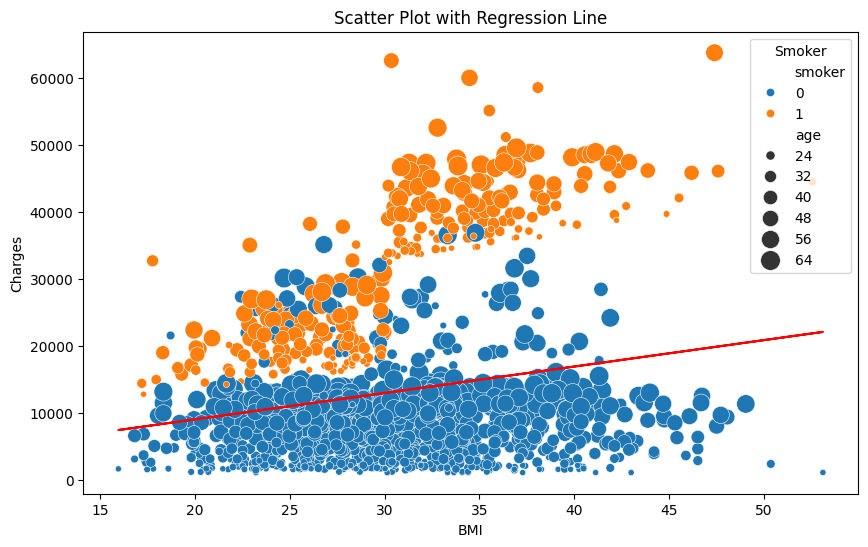

In [89]:
# plt.figure(1)
# sns.scatterplot(data= df_clean,x='bmi',y='charges',hue='smoker', size='age')
# plt.figure(2)
# plt.plot(df_clean.bmi, a*df_clean.bmi + b , 'red')


# Créer une figure avec un ensemble d'axes (sous-graphiques)
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer le nuage de points avec Seaborn sur les axes créés
sns.scatterplot(data=df_clean, x='bmi', y='charges', hue='smoker', size='age', ax=ax, sizes=(20,200))

# Tracer la ligne rouge sur les mêmes axes
ax.plot(df_clean.bmi, a * df_clean.bmi + b, 'red')

# Ajouter des étiquettes, un titre, une légende, etc.
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')
ax.set_title('Scatter Plot with Regression Line')
ax.legend(title='Smoker')

# Afficher la figure
plt.show()


#### cas AGE et de la CHARGE

In [90]:
a,b,r,p,_ = stats.linregress(df_clean.age, df_clean.charges)

a,b,r,p

# a = coefficient de pente de la regression linéaire
# b = l'ordonnée à l'origine
# r = coefficient de corrélation. Valeur comprise entre -1< r < 1 avec -1 une forte correlation négative,
# 0 absence de correlation et 1 une forte corrélation positive.
# p = p_value (valeur de probabilité) permet evaluer la validité de H0 (hypothèse nulle) 
# cad absence effet ou de différence significative

(257.2297175179149,
 3190.0217210318224,
 0.2983082125097864,
 6.975748762691313e-29)

Interpretation : Concernant le coefficient de corrélation, celui-ci s'élève à 0.2983 indiquant l'existance d'une corrélation positive. La relation entre les deux variables peut être considérée comme étant modérée mais significative.
La p-value, avec une valeur très proche de 0, indique que cette corrélation observée n'est pas dûe au hasard. Donc ces deux variables sont biens corrélées.

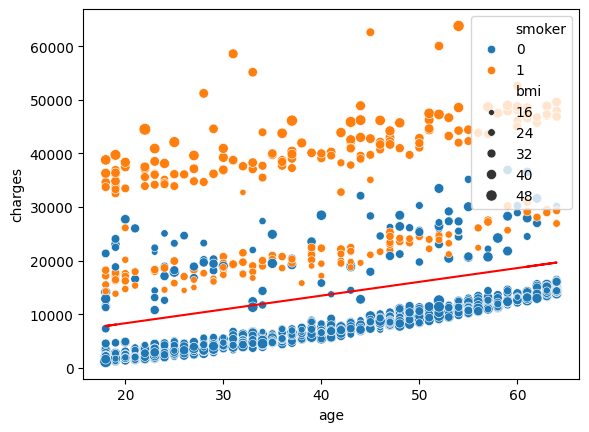

In [91]:
# fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x= df_clean.age, y = df_clean.charges, hue=df_clean.smoker, size=df_clean.bmi)

# Tracer la ligne rouge sur les mêmes axes
plt.plot(df_clean.age, a * df_clean.age + b, 'red')

### Analyse bivariée entre une variables quantitative et une variable qualitative (methode Anova)

#### Cas du TABAGISME et de la CHARGE

<Axes: xlabel='smoker', ylabel='charges'>

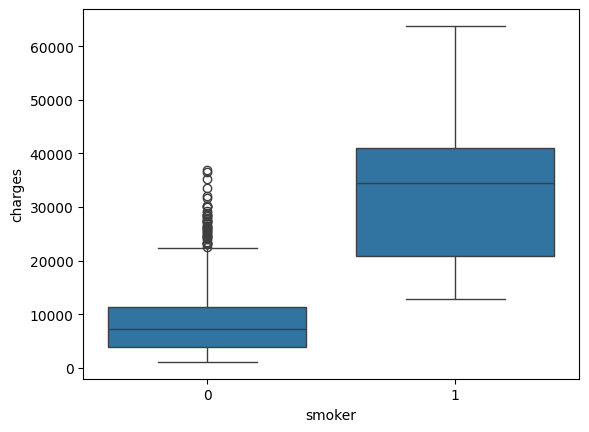

In [92]:
# représentation boxplot

sns.boxplot(x = df_clean.smoker, y=df_clean.charges)

In [93]:


statf,pvalue = stats.f_oneway(df_clean.charges[df_clean.smoker==1],df_clean.charges[df_clean.smoker==0])
statf,pvalue

(2175.7368631272116, 1.4067220949358597e-282)

Nous avons une p-value qui est très proche de 0, ce qui veut dire que HO peut être largement rejeté, et que la corrélation que nous pourrions observer entre le montant des charge et le tabagisme n'est clairement pas dûe au hasard

Nous avons un valeur de la statistique f qui semble, à première vue, élévée. Nous devons comparer cette valeur à la valeur statistique critique à l'aide du tableau de distribution F.
Determination du degré de liberté entre les groupes (k -1 ) : 2 - 1 =1
Determination du degré de liberté inter-groupe = 1337 - 2 = 1335

Avec ces deux dégrés de liberté, on se réfère au tableau de distribution F afin de récuperer la valeur statistique critique, qui est dans notre cas 3.848.

Notre valeur statistique est nettement supérieure à la valeur critique: 2175.73 > 3.848 , donc nous pouvons dire qu'il existe une divergence significative entre les groupes, et donc que la variable 'charges' varie de manière significative en fonction de la variable 'smoker'

#### Cas de la REGION SOUTHEAST et BMI

<Axes: xlabel='is_southeast', ylabel='bmi'>

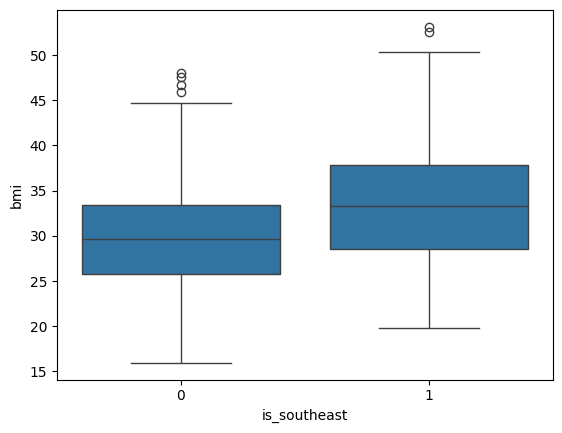

In [94]:
# boxplot

sns.boxplot(y =df_clean.bmi,x=df_clean.is_southeast)

In [95]:
statf,pvalue = stats.f_oneway(df_clean.bmi[df_clean.is_southeast==1],df_clean.bmi[df_clean.is_southeast==0])
statf,pvalue

(105.0218465125994, 8.933277252354888e-24)

Nous reprendrons les interprétations rédigées ci-dessus, nous retrouvons le cas où p-value est < 0.05 et statf > 3.848
La variable BMI varie de manière significative en fonction de la region SouthEast

### Analyse bivariée entre deux varaibles qualitatives (methode Chi-2)

#### Cas SMOKER and SEX

In [96]:
# creation d'un tableau de contingence

tab_cont = df_clean[['smoker','sex']].pivot_table(index='smoker',columns='sex', aggfunc=len,margins= True, margins_name = "Total")
tab_cont

sex,0,1,Total
smoker,,,
0,547,516,1063
1,115,159,274
Total,662,675,1337


In [97]:
# application du test Chi-2

from scipy.stats import chi2_contingency

chi2,p_value, _,_ = chi2_contingency(tab_cont)

chi2,p_value

(7.844077785733106, 0.0974597273540739)

**Interpretation:**
Calculons le niveau de degré de liberté: 
df = (r - 1)* (c-1) où r et c sont le nombre de catégories des deux variables
df = 1*1 = 1

On se rend sur la table du Chi-2, on regarde la valeur critique qui est à l'intersection du degré de liberté 1 et le niveau de signification 0.05. Nous observons une valeur de 3.841, et nous remarquons que notre valeur du chi-2 est supérieur à cette valeur. par conséquent nous pouvons conclure qu'il existe une relation significative entre les deux variables.
Cependant, on ne peut pas rejeter l'hypothèse H0 qui atteste l'indépendance des deux variables, en effet notre p_value est supérieur à 0.05.

Conclusion: On ne peut pas affirmer que la corrélation soulevée par le Chi-2 n'est pas dû au hasard, on ne considère donc pas de corrélation entre sex et smoker avec cet échantillon.